# Introduction to plotting 

In [ ]:
import b2plot
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use('belle2')

In [ ]:
%load_ext autoreload
%autoreload 2

### Creating some pseudo data

In [ ]:
import pandas as pd
import numpy as np

ns =30000
nb =80000

df = {'mass': np.append(np.random.random_sample(nb)*7 - 3.5, np.random.normal(0, 0.5, ns))}
df['sig'] = np.append(np.zeros(nb),np.ones(ns), )
df['exp'] = np.random.randint(0,8, ns+nb)
df['gauss'] = np.append(np.random.random_sample(nb)*7 - 3.5, np.random.normal(-1, 0.5, ns))

df = pd.DataFrame(df)

df1 = {'mass': np.append(np.random.random_sample(nb)*7 - 3.5, np.random.random_sample(ns)*7 - 3.5 )}
df1['sig'] = np.append(np.zeros(nb),np.ones(ns), )
df1 = pd.DataFrame(df1)

# Simple Plot

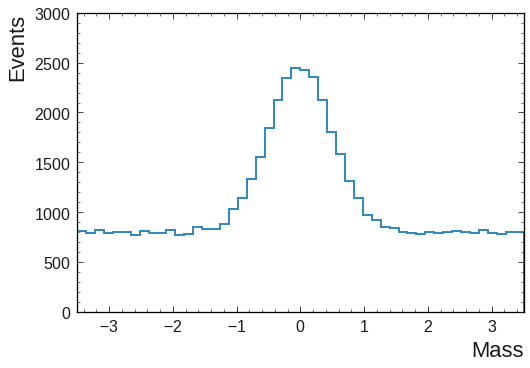

In [40]:
b2plot.hist(df.mass, lw=2, scale=0.5, weights=np.random.normal(1,0.1,len(df)))
b2plot.xlim()
b2plot.labels("Mass", "Events", root_style=1)

In [37]:
isinstance(1, bool)

[autoreload of b2plot.functions failed: Traceback (most recent call last):
  File "/home/share/basf2/externals/v01-05-02/Linux_x86_64/common/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
  File "/afs/desy.de/user/s/swehle/Tools/b2plot/src/b2plot/functions.py", line 92
    if isinstance(scale, )
                         ^
SyntaxError: invalid syntax
]


False

In [ ]:
b2plot.figure()
b2plot.hist(df.mass, color=1, style=0)
b2plot.xlim()
b2plot.labels("Mass", "Events", root_style=1)

In [ ]:
xx = df.sample(50).mass
# b2plot.figure()
b2plot.errorbar(xx, color='black')
b2plot.xlim()
plt.ylim(0)
b2plot.labels("Mass", "Events", 'GeV', root_style=1)

In [ ]:
b2plot.errorbar(xx, box=True)
b2plot.xlim()
plt.ylim(0)
b2plot.labels("Mass", "Events", 'GeV',root_style=1)

# Several Distrtibutions

In [ ]:
b2plot.hist(df.mass,  style=0,)

b2plot.hist(df1.mass,  lw=2)

b2plot.xlim()
b2plot.labels("Mass", "Events",'' )

In [ ]:
b2plot.sig_bkg_plot(df, "mass", 'sig')

In [ ]:
b2plot.figure()
b2plot.hist(df[df.sig==1].mass,  style=0, color=0, range=(-3,3), label='Signal')
b2plot.hist(df1.mass,  style=1, color=1, label='MC1')
b2plot.hist(np.random.normal(-3,1, 10000), style=2, color=3, label='NP')
b2plot.xlim()
plt.legend()
b2plot.labels("Mass", "Events",'GeV' ,1)

In [ ]:
b2plot.stacked(df, "mass", 'exp', bins=50, lw=.25)
# b2plot.errorbar(df1.mass, color='black')
b2plot.xlim()

In [ ]:
b2plot.stacked([df[df.exp==2].mass, 
                df[df.exp==3].mass], 
               bins=50, lw=.25)
# b2plot.errorbar(df1.mass, color='black')
b2plot.xlim()

In [ ]:
b2plot.stacked(df, "mass", 'exp', bins=50, color=b2plot.b2helix(8), label=range(8))
b2plot.errorbar(df.mass.values, color='black', weights=np.random.normal(1.01,0.9, len(df)), label="Data")
b2plot.xlim()
plt.legend()
b2plot.labels("$M$", "Events", 'GeV', 1)

In [ ]:
from b2plot.analysis import plot_flatness


In [ ]:
with plt.style.context(('belle2_modern')):
    b2plot.figure()
    plot_flatness(df.mass, df.gauss, xrange= (-4,3))
    b2plot.xlim()